# Task 3: PCA and covariance analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

col_list = ["altitude","days_elapsed","latitude","longitude","distance","speed", "acceleration"]
df_PCA = pd.read_csv("df_all.csv", usecols=col_list)
df_PCA.tail(5)

,altitude,days_elapsed,latitude,longitude,distance,speed,acceleration
22640060,3802.493438,39521.152731,40.914867,111.710500,101.808998,3.272432,0.000522
22640061,3795.931759,39521.153669,40.914267,111.710333,68.094614,3.026427,-0.000844
22640062,3795.931759,39521.154884,40.912467,111.710667,201.856890,6.920808,0.010303
22640063,3779.527559,39521.155185,40.911517,111.711317,118.864976,16.458227,0.101896
22640064,3802.493438,39521.155324,40.910933,111.711617,69.536328,20.860899,0.101914


C:\Users\lishi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


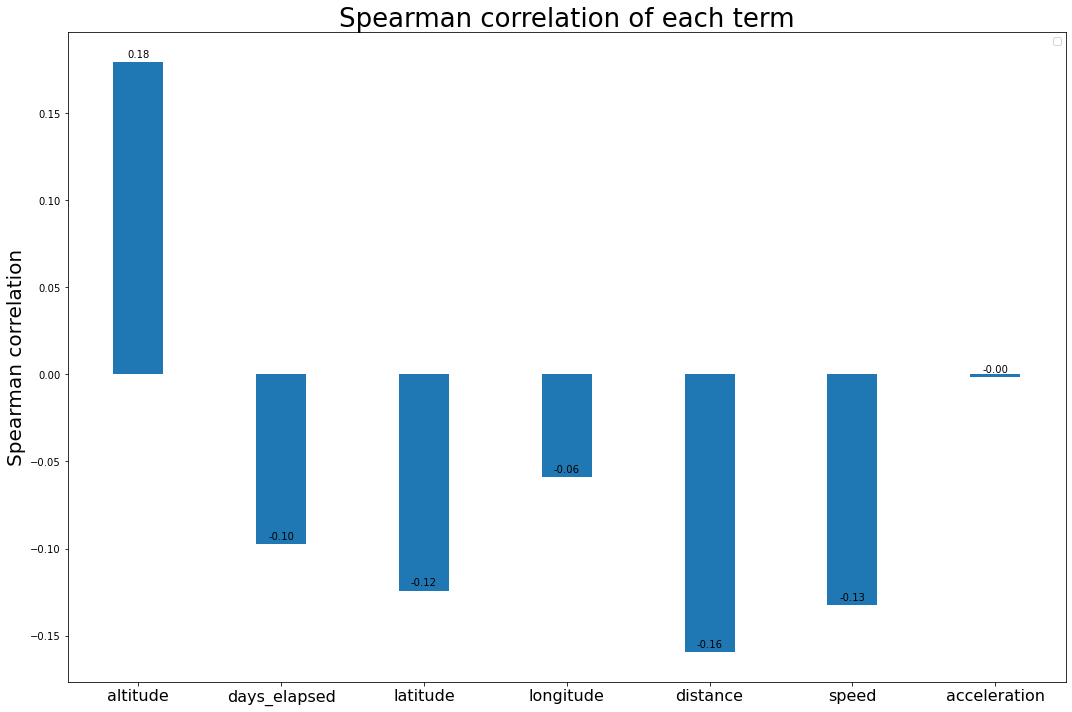

In [2]:
from scipy.stats import spearmanr
import numpy as np

map1 = {'airplane':1, 'bike':2, 'boat':3, 'bus':4, 'car':5, 'motorcycle':6, 'run':7, 'subway':8, 'taxi':9, 'train':10, 'walk':11}
df= pd.read_csv("df_all.csv")
df = df.loc[list(map(lambda x: isinstance(x, str),df['mode']))]
df['mode']= df['mode'].map(map1)
mode_num = df['mode'].values
#print(mode_num)
df_al = df["altitude"].values
df_days = df["days_elapsed"].values
df_lat = df["latitude"].values
df_long = df["longitude"].values
df_dis = df["distance"].values
df_speed = df["speed"].values
df_ac = df["acceleration"].values
#print(df_al)
al = spearmanr(mode_num, df_al)[0]
days = spearmanr(mode_num, df_days)[0]
lat = spearmanr(mode_num, df_lat)[0]
long = spearmanr(mode_num, df_long)[0]
dis = spearmanr(mode_num, df_dis)[0]
speed = spearmanr(mode_num, df_speed)[0]
ac = spearmanr(mode_num, df_ac)[0]

labels = ['altitude', 'days_elapsed','latitude','longitude','distance','speed','acceleration']
dis = (al, days, lat, long, dis, speed, ac)
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 10))
rects1 = ax.bar(x, dis, width, label='')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Spearman correlation', fontsize=20)
ax.set_title('Spearman correlation of each term', fontsize=26)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=16)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)


fig.tight_layout()

plt.show()

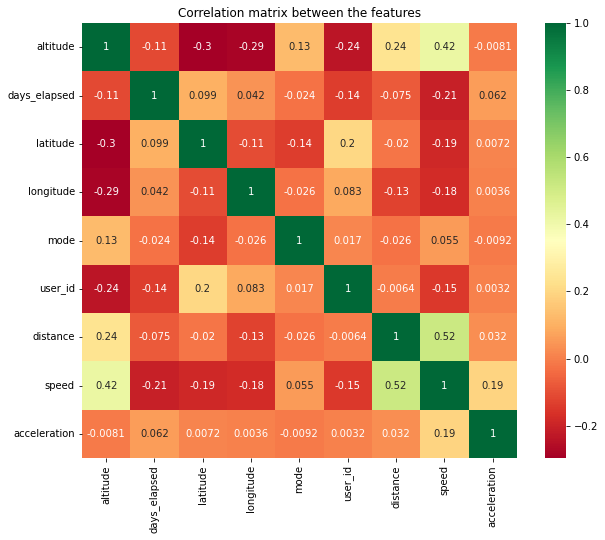

In [5]:
import seaborn as sns
correlation_matrix = df.corr()
plt.figure(figsize=(10,8))
ax = sns.heatmap(correlation_matrix, vmax=1, square=True,annot=True,cmap='RdYlGn')
plt.title('Correlation matrix between the features')
plt.show()

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
pca.fit(df_PCA)
print(pca.explained_variance_ratio_)

[8.91219464e-01 5.45158749e-02 4.56983596e-02 7.36506047e-03
 1.19585721e-03 5.24244628e-06 1.41509116e-07]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


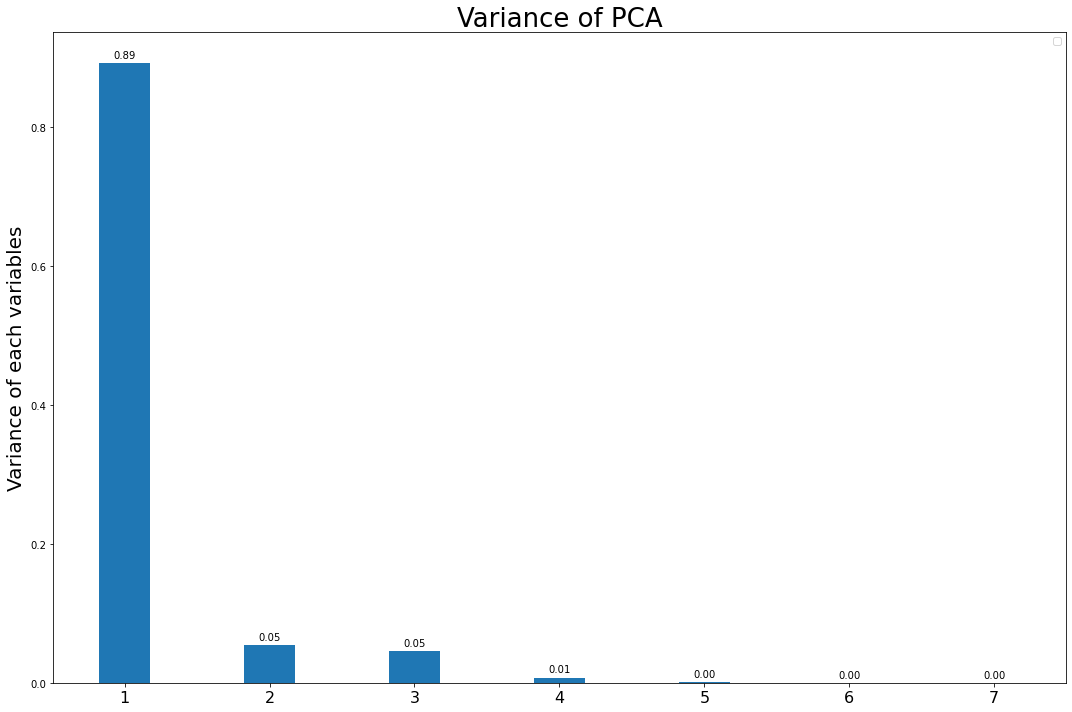

In [10]:
labels = ['1', '2','3','4','5','6','7']
dis = pca.explained_variance_ratio_
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 10))
rects1 = ax.bar(x, dis, width, label='')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Variance of each variables', fontsize=20)
ax.set_title('Variance of PCA', fontsize=26)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=16)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)


fig.tight_layout()

plt.show()

(22640065, 3)


C:\Users\lishi\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  """


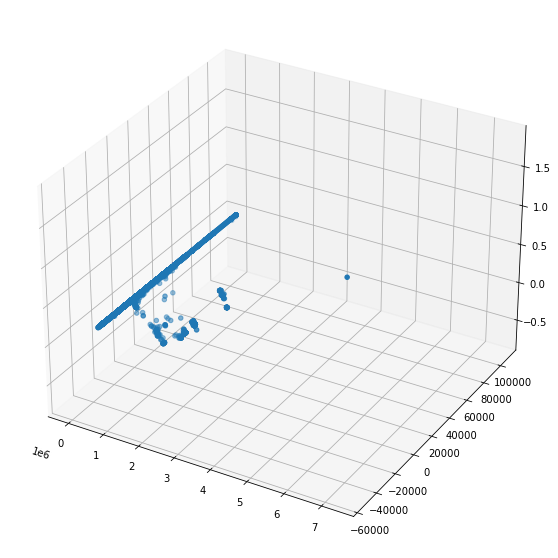

In [12]:
pca_low = PCA(n_components=3)
pc = pca_low.fit_transform(df_PCA)
print(pc.shape)
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.scatter(pc[:, 0], pc[:, 1], pc[:, 2])
plt.show()